In [1]:
import pandas as pd 
pd.options.display.max_columns = None 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')  

In [2]:
dataset = pd.read_csv('crimes.csv',delimiter=';') 

In [3]:
dataset.head() 

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [4]:
dataset.describe() 

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


In [5]:
X = dataset.iloc[:,1:8].values 
labels = dataset.iloc[:,0].values 
print(labels) 

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New-Hampshire' 'New-Jersey' 'New-Mexico' 'New-York'
 'North-Carolina ' 'North-Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode-Island' 'South-Carolina ' 'South-Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West-Virginia' 'Wisconsin' 'Wyoming']


### PCA et standardisation 

In [6]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

In [7]:
scaler = StandardScaler() 
X_sclaer = scaler.fit_transform(X) # On applique le PCA sur les données standardisés 
pca = PCA(n_components=None) 
X_pca = pca.fit_transform(X_sclaer) # Les cordonnées des données sur l'espace PCA 

In [8]:
X_pca.shape 

(50, 7)

In [9]:
X_pca[0:3,:] 

array([[-0.05038664, -2.11738312,  0.50673755,  0.25353338,  0.50354699,
        -0.43802073, -0.11927372],
       [ 2.44609952,  0.16821368, -0.07043914,  1.17225334,  1.48497546,
         1.5130117 , -0.4695271 ],
       [ 3.04473945,  0.85352343, -1.76973694, -0.11739168,  0.28305576,
        -1.08130788, -0.05809892]])

In [10]:
print(pca.explained_variance_ratio_) # Variance de chaque variable 

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [11]:
print(sum(pca.explained_variance_ratio_[:2]))  

0.7648116201908641


### Visualisation 

Text(0, 0.5, 'PC_2')

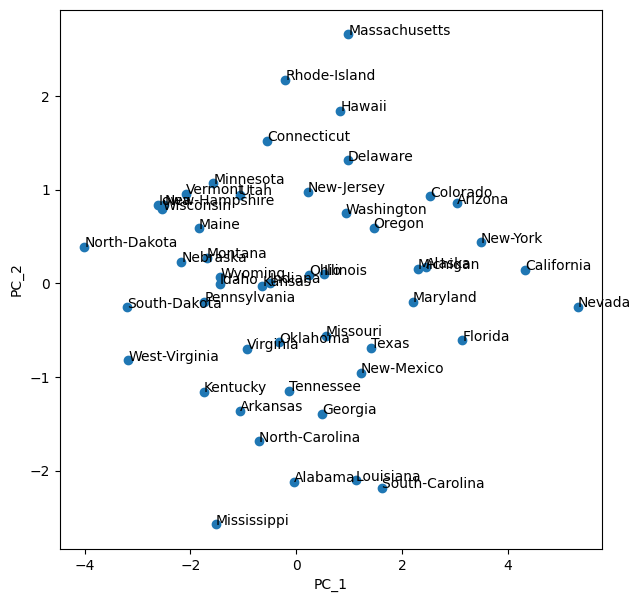

In [13]:
plt.figure(figsize=(7,7)) 
plt.scatter(X_pca[:,0],X_pca[:,1])
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]) : 
    plt.annotate(label,xy=(x,y)) 
plt.xlabel('PC_1') 
plt.ylabel('PC_2') 